## This practice is for Exxon Mobile Stock
We deploy a linear regression model to answer if the explantory variable (oil) does a good job at predicting the dependent cariable (a single variable of stock)

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats 
from scipy.stats import kurtosis, skew

%matplotlib inline

In [21]:
path = r"/Users/samys/Desktop/oil_exxon.xlsx"
price_data = pd.read_excel(path)

#setting date column as index
price_data.index = pd.to_datetime(price_data['date'])
#drop old data frame
price_data = price_data.drop(['date'], axis =1)


price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [22]:
#checking data types
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [23]:
#defining new name
new_column_names ={'exon_price' : 'exxon_price'}

#rename column 
price_data = price_data.rename(columns = new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [25]:
#checking for missing values
price_data.isna().any()

#dropping missing values
price_data = price_data.dropna()

#verify
display(price_data.isna().any())

exxon_price    False
oil_price      False
dtype: bool

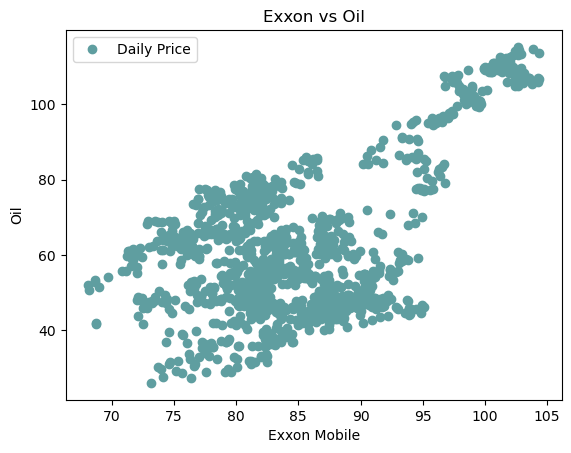

In [26]:
#defining x and y 
x = price_data['exxon_price'] 
y = price_data['oil_price']

#creating scatterplot 
plt.plot(x,y, 'o', color = 'cadetblue', label= 'Daily Price') 

#formatting
plt.title('Exxon vs Oil') 
plt.xlabel('Exxon Mobile') 
plt.ylabel('Oil')
plt.legend() 
plt.show()

In [28]:
#meausuring correlation and returning correlation matrix 
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [29]:
#statistical summary 
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<Axes: title={'center': 'exxon_price'}>,
        <Axes: title={'center': 'oil_price'}>]], dtype=object)

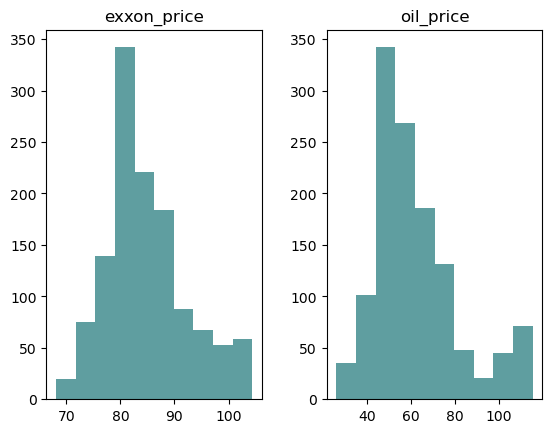

In [30]:
price_data.hist(grid = False, color  = 'cadetblue')

In [37]:
#calculating excess kurtosis using fisher method
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher=True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher=True)

#calculating skewness 
exxon_skew = skew(price_data['exxon_price']) 
oil_skew = skew(price_data['oil_price'])

display("Exxon Kurtosis: {:2}".format(exxon_kurtosis))
display("Oil Kurtosis: {:2}".format(oil_kurtosis))

display("Exxon Skew: {:.2}".format(exxon_skew))
display("Oil Skew: {:.2}".format(oil_skew))

'Exxon Kurtosis: 0.08838507514930338'

'Oil Kurtosis: 0.5321055130944878'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

In [38]:
#kurtosis test 
display('Exxon') 
display(stats.kurtosistest(price_data['exxon_price'])) 
display('Oil') 
display(stats.kurtosistest(price_data['oil_price'])) 

#skew test 
display('Exxon') 
display(stats.skewtest(price_data['exxon_price'])) 
display('Oil') 
display(stats.skewtest(price_data['oil_price'])) 

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.472427513833207)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.783976845634166e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159922e-35)

In [40]:
#defining input and output variable 
Y = price_data.drop('oil_price', axis =1) 
X = price_data[['oil_price']]

#splitting and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)

In [41]:
#creating regression model object
regression_model = LinearRegression()

#passing through X_train and y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [42]:
#grabbing coefficient
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("Coefficient of model is {:.2}".format(coefficient))
print("Intercept of model is {:.4}".format(intercept))

Coefficient of model is 0.23
Intercept of model is 70.55


In [44]:
#testing predicition
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("Predicted value is {:.4}".format(predicted_value))

Predicted value is 86.0


/Users/samys/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [45]:
#getting multiple prediction
y_predict = regression_model.predict(X_test)

#show first 5 predictions
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

In [46]:
#evaluating the model

#defining input
X2 = sm.add_constant(X)

#Creating OLS model
model = sm.OLS(Y,X2)

#fitting data 
est = model.fit()


In [48]:
#making some confidence intervals, 95% by default 
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [49]:
#estimating p-values 
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

In [51]:
#calculating mean squared error 
model_mse = mean_squared_error(y_test, y_predict)
#calculate mean absolute error 
model_mae = mean_absolute_error(y_test, y_predict)
#calculate root mean squared error
model_rmse = math.sqrt(model_mse)
#displaying output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 38.8
MAE 5.05
RMSE 6.23


In [52]:
#finding r-squared 
model_r2 = r2_score(y_test, y_predict) 
print("R2 {:.2}".format(model_r2))

R2 0.36


In [53]:
#summary 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          1.42e-123
Time:                        22:29:40   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

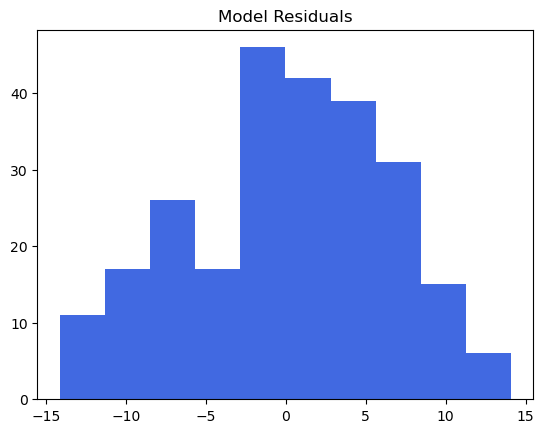

In [54]:
#plotting residuals
(y_test - y_predict).hist(grid = False, color =  'royalblue')
plt.title("Model Residuals")
plt.show

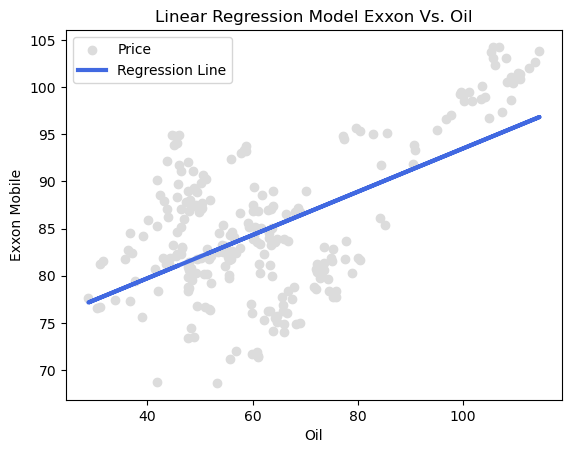

Oil coefficient:0.23
Mean squared error: 38.75
Root Mean squared error: 6.225
R2 score: 0.36


In [62]:
#plotting outputs 
plt.scatter(X_test,y_test, color = 'gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color = 'royalblue', linewidth = 3, linestyle = '-', label = 'Regression Line') 

plt.title("Linear Regression Model Exxon Vs. Oil")
plt.xlabel("Oil") 
plt.ylabel("Exxon Mobile") 
plt.legend()
plt.show() 

#coefficients 
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

#mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

#mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

#Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))

In [63]:
import pickle 

#pickle the model
with open('my_linear_regression.sav', 'wb') as f: 
    pickle.dump(regression_model, f)

#loading it back in 
with open('my_linear_regression.sav', 'rb') as f: 
    regression_model_2 = pickle.load(f)

#making new prediction 
regression_model_2.predict([[67.33]])

/Users/samys/Library/jupyterlab-desktop/jlab_server/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[85.99798304]])